# Load flight data

Create `Flight` data structure for working with flight trajectories.

In [1]:
import numpy as np
import pandas as pd

from pycontrails import Flight
from pycontrails.datalib.ecmwf import ERA5

## Create Flight instance

### From Numpy Arrays

In [2]:
# waypoints
longitude = np.linspace(0, 50, 100)
latitude = np.linspace(0, 10, 100)
altitude = np.linspace(11000, 11500, 100)
time = pd.date_range("2022-03-01 00:00:00", "2022-03-01 02:00:00", periods=100)

fl = Flight(longitude=longitude, latitude=latitude, altitude=altitude, time=time, flight_id="my_id")
fl

Flight [4 keys x 100 length, 1 attributes]
	Keys: longitude, latitude, time, altitude
	Attributes:
	time                [2022-03-01 00:00:00, 2022-03-01 02:00:00]
	longitude           [0.0, 50.0]
	latitude            [0.0, 10.0]
	altitude            [11000.0, 11500.0]
	flight_id           my_id

### From Pandas DataFrame

In [3]:
# Example flight
df = pd.DataFrame()
df["longitude"] = np.linspace(0, 50, 100)
df["latitude"] = np.linspace(0, 10, 100)
df["altitude"] = 11000
df["time"] = pd.date_range("2022-03-01 00:00:00", "2022-03-01 02:00:00", periods=100)
fl = Flight(data=df, flight_id="ABC")
fl

Flight [4 keys x 100 length, 1 attributes]
	Keys: longitude, latitude, altitude, time
	Attributes:
	time                [2022-03-01 00:00:00, 2022-03-01 02:00:00]
	longitude           [0.0, 50.0]
	latitude            [0.0, 10.0]
	altitude            [11000.0, 11000.0]
	flight_id           ABC

### Create Flight without Waypoints

In [4]:
# Example flight
attrs = dict(flight_id="1234", equip="A532")
fl = Flight.create_empty(attrs=attrs)
fl

Flight [4 keys x 0 length, 2 attributes]
	Keys: longitude, latitude, time, altitude
	Attributes:
	flight_id           1234
	equip               A532

### Create from CSV file

In [5]:
# load flight
df = pd.read_csv("data/flight.csv")
fl = Flight(data=df, flight_id="csv")
fl

Flight [4 keys x 175 length, 1 attributes]
	Keys: longitude, latitude, altitude, time
	Attributes:
	time                [2022-03-01 00:50:00, 2022-03-01 03:47:00]
	longitude           [-97.026, -77.036]
	latitude            [32.931, 38.854]
	altitude            [190.5, 11582.4]
	flight_id           csv

## Using the Flight instance

The `flight.data` attribute is a dictionary with `np.ndarray` values

In [6]:
# waypoints
longitude = np.linspace(0, 50, 10)
latitude = np.linspace(0, 10, 10)
altitude = np.linspace(11000, 11500, 10)
time = pd.date_range("2022-03-01 00:00:00", "2022-03-01 02:00:00", periods=10)
attrs = {"flight_id": "ABC123"}
fl = Flight(longitude=longitude, latitude=latitude, altitude=altitude, time=time, attrs=attrs)

In [7]:
fl.data.keys()

dict_keys(['longitude', 'latitude', 'time', 'altitude'])

`Flight` attributes are stored in a dictionary on the `attrs` attribute.

In [8]:
fl.attrs

{'flight_id': 'ABC123'}

Data can be set / get from the `Flight` like a dictionary

In [9]:
# get
lat = fl["latitude"]

# set
lat[5] = 20
fl["latitude"] = lat

# get updated
fl["latitude"][5]

np.float64(20.0)

The `Flight` class contains the following convenience properties

In [10]:
# Pressure altitude, in hPa
fl.level

array([226.3170091 , 224.34300442, 222.3862176 , 220.44649846,
       218.52369813, 216.61766904, 214.7282649 , 212.85534072,
       210.99875274, 209.15835847])

In [11]:
# Altitude, in ft
fl.altitude_ft

array([36089.23884514, 36271.5077282 , 36453.77661126, 36636.04549431,
       36818.31437737, 37000.58326043, 37182.85214348, 37365.12102654,
       37547.38990959, 37729.65879265])

In [12]:
# Values that are constant along the flight path

# set constant value along flight waypoints
fl["constant"] = np.full(shape=fl.shape, fill_value=100)

fl.constants

{'constant': 100, 'flight_id': 'ABC123'}

In [13]:
# Flight distance, in meters
fl.length

np.float64(7818835.115366629)

In [14]:
# Time start/end
print(fl.time_start)
print(fl.time_end)

2022-03-01 00:00:00
2022-03-01 02:00:00


In [15]:
# Flight duration, as a pandas Timedelta
fl.duration

Timedelta('0 days 02:00:00')

In [16]:
# Max time gap between waypoints, as a pandas Timedelta
fl.max_time_gap

Timedelta('0 days 00:13:20')

In [17]:
# Max distance gap between waypoints, in meters
fl.max_distance_gap

np.float64(1831403.3492360476)

## Intersect with Met data

In [18]:
# waypoints
longitude = np.linspace(0, 50, 50)
latitude = np.linspace(0, 10, 50)
altitude = np.linspace(11000, 11500, 50)
time = pd.date_range("2022-03-01 00:00:00", "2022-03-01 02:00:00", periods=50)
fl = Flight(longitude=longitude, latitude=latitude, altitude=altitude, time=time, flight_id="ABC")

In [19]:
# domain
time = ("2022-03-01 00:00:00", "2022-03-01 03:00:00")
variables = ["t", "q", "u", "v", "w", "ciwc", "z", "cc"]
pressure_levels = [300, 250, 200]

# get met data
era5 = ERA5(time=time, variables=variables, pressure_levels=pressure_levels)
met = era5.open_metdataset()

In [20]:
# interpolate to nearest grid member
fl.intersect_met(met["air_temperature"], method="nearest")

array([231.63002014, 231.50404358, 231.72962952, 231.08802795,
       218.82527161, 218.83894348, 219.00691223, 218.07820129,
       218.66316223, 219.61824036, 219.48347473, 219.66511536,
       219.89851379, 219.86070251, 219.95152283, 220.17027283,
       220.15171814, 220.06773376, 219.71324158, 219.51890564,
       219.56480408, 219.54624939, 219.39976501, 219.19078064,
       219.01890564, 219.02085876, 219.36558533, 219.42710876,
       219.39292908, 219.4964447 , 219.63902283, 219.63316345,
       219.80308533, 219.7230072 , 218.88414001, 218.68785095,
       219.5901947 , 219.66666748, 219.75786176, 219.57713128,
       219.53733741, 219.87641433, 219.74045194, 219.47930469,
       219.34500039, 219.28696766, 219.14354393, 219.04074311,
       218.90146457, 218.93462613])

In [21]:
# linear interpolation
fl.intersect_met(met["air_temperature"], method="linear")

array([225.77816471, 225.39081749, 225.21864816, 224.88374538,
       225.13023744, 224.75325132, 224.69848275, 224.51222972,
       224.65632724, 225.06847509, 225.27786534, 225.23722457,
       225.27403387, 225.21623551, 225.02269775, 225.16207685,
       225.02480733, 224.83869026, 224.50832969, 224.36192212,
       224.27046507, 224.02768754, 223.71681302, 223.55308994,
       223.37665811, 223.3523213 , 223.48887953, 223.45060716,
       223.46022722, 223.51031432, 223.47441969, 223.33966081,
       223.3370329 , 223.19574842, 222.68131634, 222.43277034,
       222.99376785, 222.91001375, 222.9434397 , 222.70614349,
       222.66987003, 222.84312141, 222.59153886, 222.31971702,
       222.06891378, 221.91065757, 221.70157927, 221.52471477,
       221.33913034, 221.26541337])

## Get Lengths

In [22]:
# total flight length in meters
fl.length

np.float64(5642421.5973290345)

In [23]:
# intersect flight with air temperature
fl["temp"] = fl.intersect_met(met["air_temperature"], method="nearest")

# get the length of the flight where ambient temperature is > 226 K
fl.length_met("temp", threshold=226)

np.float64(462850.7958842697)

## Plot and Resample

np.float64(115715.16936791067)

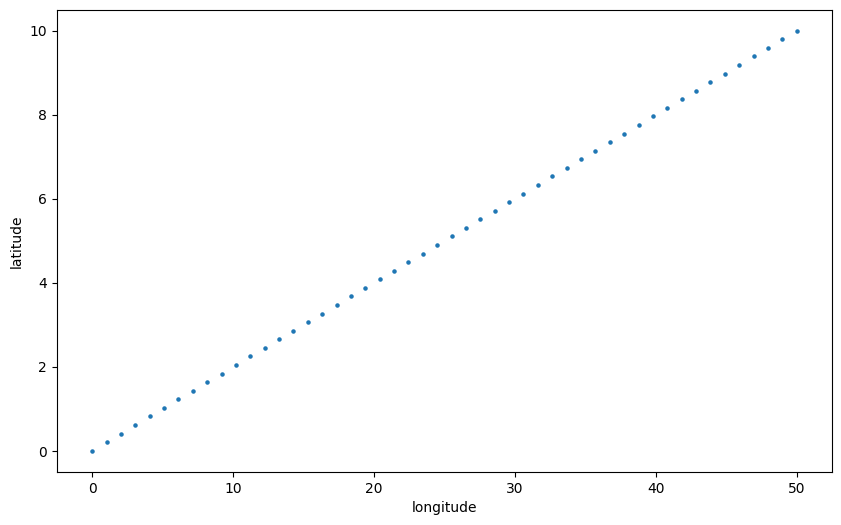

In [24]:
fl.plot(kind="scatter", s=5, figsize=(10, 6))
fl.max_distance_gap

np.float64(472488.41576537804)

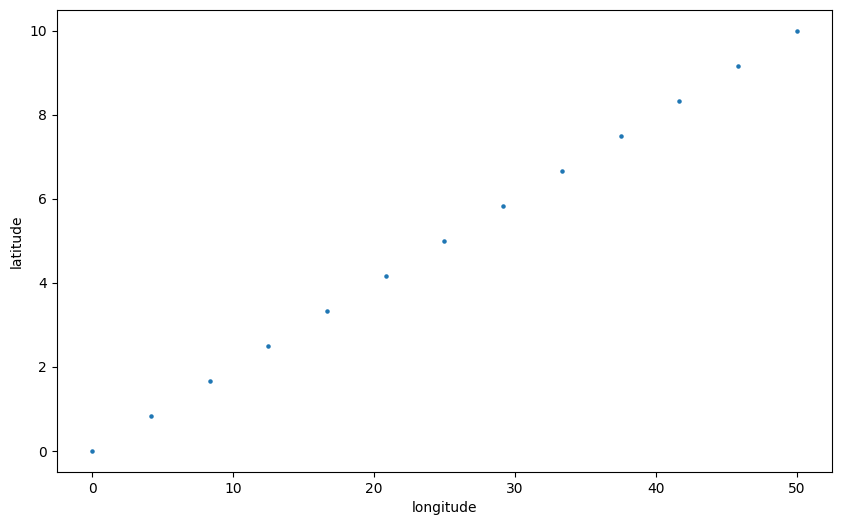

In [25]:
# resample with 10 minute waypoints
fl = fl.resample_and_fill("10min")

fl.plot(kind="scatter", s=5, figsize=(10, 6))
fl.max_distance_gap

np.float64(7874.98815033573)

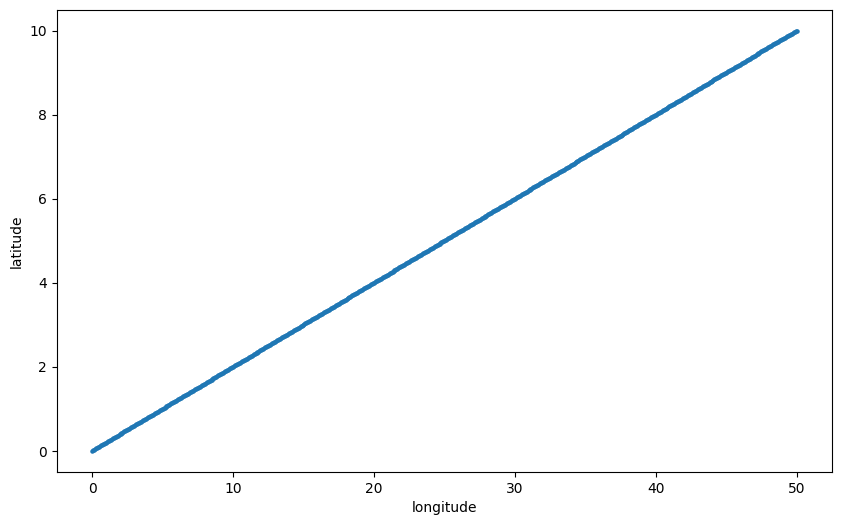

In [26]:
# resample with 10 second waypoints
fl = fl.resample_and_fill("10s")

fl.plot(kind="scatter", s=5, figsize=(10, 6))
fl.max_distance_gap

## Clean and smooth a noisy flight with gaps

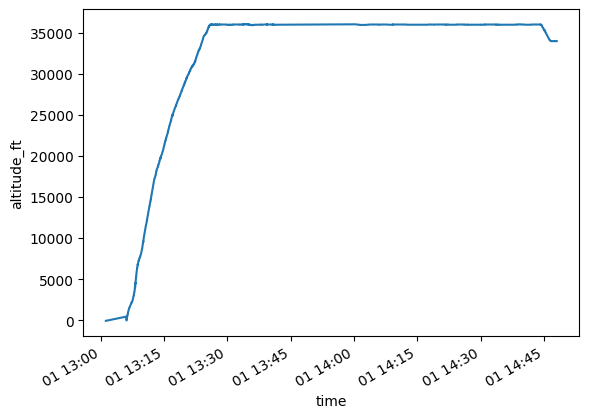

In [27]:
df = pd.read_csv("data/flight-noisy.csv")
df["time"] = pd.to_datetime(df["time"])
f = Flight(df, drop_duplicated_times=True)
f.plot_profile();

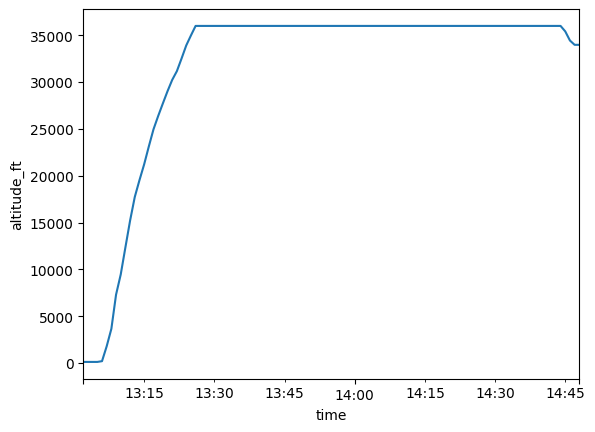

In [28]:
f = f.clean_and_resample(nominal_rocd=20)
f.plot_profile();